In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install seaborn


     |████████████████████████████████| 285 kB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 16.2 MB/s eta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp37-cp37m-macosx_10_9_x86_64.whl (61 kB)


In [2]:
!ls


Cleaning and Preparing News Data.ipynb
GPT2-Model-Fakes
Grover-Fakes
News-DataSet
Notebooks
README.md
Screen Shot 2021-05-11 at 9.26.19 PM.png
Topic Modeling.ipynb
Visualization Dashboards
best_model
real_news_lda.html
real_news_text_lda.html


## Compiling Data From Different CSV's

we load data from data set of fake news

In [21]:
fake = pd.read_csv('./News-DataSet/Fake.csv')

In [22]:
fake['label'] = 'FAKE'

In [23]:
fake = fake[['title', 'text', 'label']]

In [37]:
fake.text[8]

'Many people have raised the alarm regarding the fact that Donald Trump is dangerously close to becoming an autocrat. The thing is, democracies become autocracies right under the people s noses, because they can often look like democracies in the beginning phases. This was explained by Republican David Frum just a couple of months into Donald Trump s presidency, in a piece in The Atlantic called  How to Build an Autocracy. In fact, if you really look critically at what is happening right now   the systematic discrediting of vital institutions such as the free press and the Federal Bureau of Investigation as well the direct weaponization of the Department of Justice in order to go after Trump s former political opponent, 2016 Democratic nominee Hillary Clinton, and you have the makings of an autocracy. We are more than well on our way. Further, one chamber of Congress, the House of Representatives, already has a rogue band of Republicans who are running a parallel investigation to the o

In [25]:
fake2 = pd.read_csv('./News-DataSet/fake 2.csv')

In [26]:
fake2 = fake2[['title', 'text']]

In [55]:
fake2.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [28]:
fake2 = fake2.dropna()

In [29]:
len(fake2)

12273

In [30]:
fake2['label'] = 'FAKE'

In [133]:
fake2.text[435]

"Prof. Rafiq Islam Responds to the Vice-Chancellor of the University of Punjab Outlining the Background of the Hall Case at the 2 Shares\n1 0 0 1\nDear Vice Chancellor Kamran:\nSalam from the East coast of Canada.\nThank you for taking the time to address this important issue regarding Professor Hall. Like yourself, we all have been stunned by the voracity of Dr. Mahon’s action. We used to think academics of certain reputation were above the reach of the tentacles of the Establishment. We all hoped that a president would not resort to such a shameless pandering to a special interest group. However, B’nai Brith is not just a special interest group, it is perhaps the most vindictive organization that has ever received prominence in the west. Allow me to elaborate.\nYou have correctly identified B’nai Brith to be “behind this movement against shutting down free speech.” While this statement is accurate, this phenomenon of targeting Canadian universities and Canadian society is not somethi

In [14]:
fake = pd.concat(objs = [fake, fake2], axis = 0)

In [15]:
fake.reset_index(drop=True, inplace=True)

In [192]:
fake.text[1316]

'Judging by how disastrous Donald Trump s first overseas trip went, it couldn t have been any more clear that Trump is not physically fit enough to deal with the exhausting demands of being president. He lacked the stamina and energy, as he was reportedly exhausted by the second day and he even had to make use of a golf cart to follow behind other world leaders as they walked.This was truly humiliating for Trump, especially after spending his entire presidential campaign insulting Democratic rival Hillary Clinton s stamina   even though she has traveled extensively during her time as Secretary of State and worked tirelessly on her presidential campaign despite having pneumonia. Yet, Fox News is choosing to ignore the obvious and decided to defend Trump, which was absolutely ridiculous.On Wednesday, Fox News host Jon Scott stated that because Trump has the energy to tweet incoherent thoughts at night, he truly has the  stamina to be president.  Yes, really.After midnight, Trump had sent

#### Dealing with Real News

In [5]:
real = pd.read_csv('./News-DataSet/True.csv')

In [6]:
real['label'] = 'REAL'

In [7]:
real = real[['title', 'text', 'label']]

In [8]:
real

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,REAL
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,REAL
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,REAL
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,REAL
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,REAL
...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,REAL
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",REAL
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,REAL
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,REAL


In [9]:
real2 = pd.read_csv('./News-DataSet/articles3.csv').drop(['Unnamed: 0'],axis=1)

In [10]:
real2['text'] = real2['content']

In [11]:
real2['label'] = 'REAL'

In [12]:
real2 = real2.drop('content', axis = 1)

In [13]:
real2 = real2[['title', 'text', 'label']]

In [14]:
real = pd.concat(objs = [real, real2], axis = 0)

In [15]:
real.title[0]

0    As U.S. budget fight looms, Republicans flip t...
0    Alton Sterling’s son: ’Everyone needs to prote...
Name: title, dtype: object

In [16]:
real.reset_index(drop=True, inplace=True)

In [17]:
real

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,REAL
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,REAL
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,REAL
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,REAL
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,REAL
...,...,...,...
63983,An eavesdropping Uber driver saved his 16-year...,Uber driver Keith Avila picked up a p...,REAL
63984,Plane carrying six people returning from a Cav...,Crews on Friday continued to search L...,REAL
63985,After helping a fraction of homeowners expecte...,When the Obama administration announced a...,REAL
63986,"Yes, this is real: Michigan just banned bannin...",This story has been updated. A new law in...,REAL


We load data from combined data set of real and fake news

In [49]:
news = pd.read_csv('./News-DataSet/news.csv')

In [50]:
news = news.drop('Unnamed: 0', axis = 1)

In [174]:
news.text[1652]

'Speaking at a joint press conference Thursday morning at the White House with Canadian Prime Minister Justin Trudeau, President Obama makes extended comments regarding the 2016 election, and its unprecedented political polarization. \n\n \n\n "I have been blamed by the Republicans for a lot of things," the president said. "But to be blamed for their primaries and who they are selecting is... novel."\n\n \n\n "I’m not going to validate some notion that the Republican crackup that’s been taking place is a consequence of actions that I’ve taken," he said. \n\n \n\n "I don’t think I was the one to prompt questions about my birth certificate, for example," he said. "I don’t recall saying, \'Hey, why don’t you ask me about that.\'"\n\n \n\n "It\'s not as if there\'s a massive difference between Mr. Trump\'s position on immigration and Mr. Cruz\'s. Mr. Trump may be more provocative in terms of how he sighs, but says them, but they\'re not that different."\n\n \n\n'

We notice there are some differences in the Fake and Real datasets that could make our labeling algorithm take an easy route for labeling. We must clean the data so that the formating differences in both data sets are unrecognizable. We will try and format data like the 'news' data set.

##### Diferences that could make the algorithms job too easy

- The real data vs fake datasets contain different subject labels, this could make the algoirthm take the easy route of just using the subject label to discern between real and fake. 

- The capitalization is different between the fake and real data set

- the text for the real text contains as first words the outlet name and location

### Creating a function that formats titles in both data sets the same way.



In [36]:
fake.title[0]

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing'

In [ ]:
#we apply the python title function to our fake dataset.

In [37]:
fake_title = fake

In [38]:
fake_title['title'] = fake_title['title'].str.title()

In [39]:
fake_title

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",FAKE
3,Trump Is So Obsessed He Even Has Obama’S Name...,"On Christmas day, Donald Trump announced that ...",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,FAKE
...,...,...,...
35749,Tesla Earnings Smash Expectations After Dramat...,"Oct 26, 2016 4:26 PM 0 SHARES \nThere was a su...",FAKE
35750,Rules For Rulers (Or How The World Really Works),"The following video is a must watch, particula...",FAKE
35751,Fact Check: Trump Is Right That Clinton Might ...,She explains : \nHillary Clinton wants to star...,FAKE
35752,Caught On Tape: Isis Destroys Iraqi Abrams Wit...,"YHC-FTSE Oct 26, 2016 5:14 PM \nWould have bee...",FAKE


In [ ]:
# we apply the title function to our real data set

In [40]:
real_title = real

In [41]:
real_title['title'] = real_title['title'].str.title()

In [77]:
real_title

,title,text,label
0,"As U.S. Budget Fight Looms, Republicans Flip T...",- The head of a conservative Republican facti...,REAL
1,U.S. Military To Accept Transgender Recruits O...,- Transgender people will be allowed for the ...,REAL
2,Senior U.S. Republican Senator: 'Let Mr. Muell...,- The special counsel investigation of links ...,REAL
3,Fbi Russia Probe Helped By Australian Diplomat...,- Trump campaign adviser George Papadopoulos ...,REAL
4,Trump Wants Postal Service To Charge 'Much Mor...,- President Donald Trump called on the U.S. P...,REAL
...,...,...,...
63983,An Eavesdropping Uber Driver Saved His 16-Year...,Uber driver Keith Avila picked up a p...,REAL
63984,Plane Carrying Six People Returning From A Cav...,Crews on Friday continued to search L...,REAL
63985,After Helping A Fraction Of Homeowners Expecte...,When the Obama administration announced a...,REAL
63986,"Yes, This Is Real: Michigan Just Banned Bannin...",This story has been updated. A new law in...,REAL


### Cleaning the text column

In [98]:
import regex as re

In [44]:
regex_expression = r'.*\(Reuters\)'

In [45]:
real['text'] = real['text'].str.replace(regex_expression, '')

<ipython-input-45-00dc7ef57046>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  real['text'] = real['text'].str.replace(regex_expression, '')


In [1]:
real.text[1]

NameError: name 'real' is not defined

In [47]:
real.text

0         - The head of a conservative Republican facti...
1         - Transgender people will be allowed for the ...
2         - The special counsel investigation of links ...
3         - Trump campaign adviser George Papadopoulos ...
4         - President Donald Trump called on the U.S. P...
                               ...                        
63983             Uber driver Keith Avila picked up a p...
63984             Crews on Friday continued to search L...
63985         When the Obama administration announced a...
63986         This story has been updated. A new law in...
63987         The nation’s first recreational marijuana...
Name: text, Length: 63988, dtype: object

In [78]:
#We shuffle the real news so that we can keep only 30-40k news articles and maintain a roughly even distribution of real vs fake
real = real.sample(frac=1).reset_index(drop=True)

In [20]:
real.text[4]

'SEATTLE/WASHINGTON (Reuters) - President Donald Trump called on the U.S. Postal Service on Friday to charge “much more” to ship packages for Amazon (AMZN.O), picking another fight with an online retail giant he has criticized in the past.     “Why is the United States Post Office, which is losing many billions of dollars a year, while charging Amazon and others so little to deliver their packages, making Amazon richer and the Post Office dumber and poorer? Should be charging MUCH MORE!” Trump wrote on Twitter.  The president’s tweet drew fresh attention to the fragile finances of the Postal Service at a time when tens of millions of parcels have just been shipped all over the country for the holiday season.  The U.S. Postal Service, which runs at a big loss, is an independent agency within the federal government and does not receive tax dollars for operating expenses, according to its website.  Package delivery has become an increasingly important part of its business as the Internet 

### Concatenating the Real, Fake & News Data Sets

In [61]:
real_fake = pd.concat(objs = [real, fake], axis = 0)

In [62]:
#We shuffle the data frame to blend fake and real rows
real_fake = real_fake.sample(frac=1).reset_index(drop=True)

In [81]:
real_fake

,title,text,label
0,What Cher Just Did For The Residents Of Flint...,"What s happening in Flint, Michigan is beyond ...",FAKE
1,Drunks And Empty Seats: Crooked Hillary Pander...,The woman whose criminal investigation has bee...,FAKE
2,Pence Delays Middle East Trip In Case Needed F...,- U.S. Vice President Mike Pence will delay a...,REAL
3,Colombia Airline Restarts Venezuela Flights Af...,Colombia’s Avianca airline AVT_p. CN will res...,REAL
4,War Crimes Accusations: Guess Who’S Talking | ...,Region: USA in the World As the voices demandi...,FAKE
...,...,...,...
71749,"After A Century, Planned Parenthood Needs To B...","After a Century, Planned Parenthood Needs to b...",FAKE
71750,Obama’S Press Secretary Just Smacked Down A H...,In his efforts to weasel out of answering ques...,FAKE
71751,Oops! Lindsey Vonn Gets Hit With Big Dose Of K...,"Only 3 days ago, Lindsey Vonn told CNN that sh...",FAKE
71752,Trump’S ‘Condolences’ To Grieving Star Were A...,"Trump has no compassion, and he has no empathy...",FAKE


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

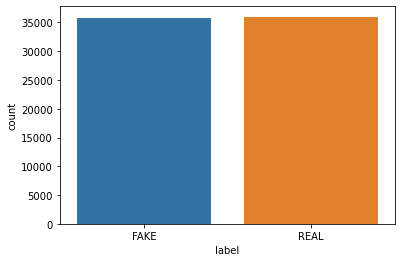

In [82]:
sns.countplot(real_fake.label)

In [83]:
real_fake2 = pd.concat([real_fake, news], axis = 0)

In [84]:
real_fake2 = real_fake2.sample(frac=1).reset_index(drop=True)

/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

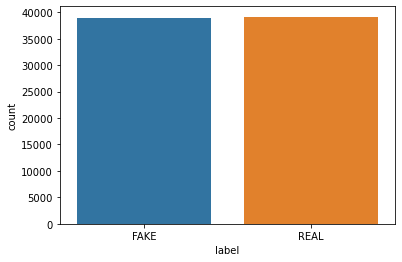

In [85]:
sns.countplot(real_fake2.label)

In [86]:
len(real_fake2)

78089

### PREPARING NEWS DATA FOR NLP

Removing unwanted characters such as punctuation, HTML tags, and emoticons using regular expressions.


Removing stop words (words that are extremely common in the English language and are generally not necessary for text classification purposes).


Lemmatization, which is the process of reducing a word to its lemma or dictionary form. For example, the word run is the lemma for the words runs, ran, and running.

In [ ]:
!pip install spacy

In [ ]:
! python -m spacy download en_core_web_md


In [89]:
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
binary_fake_real = {'REAL': 0, 'FAKE':1}

In [90]:
nlp = spacy.load('en_core_web_md')

In [91]:
from spacy.lang.en.stop_words import STOP_WORDS

In [95]:
def text_preprocessor(text):
    text = re.sub('<[^>]*>', '', text) # Effectively removes HTML markup tags
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
    
    doc = nlp(text)
    #Lemmatization, which is the process of reducing a word to its lemma or dictionary form. 
    #For example, the word run is the lemma for the words runs, ran, and running.
    text = ' '.join([token.lemma_ for token in doc if token.text not in STOP_WORDS])
    return text

### tokenization and Lemmatization function to our text and text columns

In [99]:
real_fake2['text'] = real_fake2.text.apply(text_preprocessor)

In [104]:
real_fake2.label.value_counts()

REAL    39171
FAKE    38918
Name: label, dtype: int64

# Dividing Data in Train, Test, Split

In [ ]:
from sklearn.model_selection import train_test_split

In [105]:
X = real_fake2[['title', 'text']]
y = real_fake2['label']

In [106]:
print(len(X))
print(len(y))

78089
78089


In [ ]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [ ]:
! ls


In [107]:
data_processed = pd.DataFrame({'title': X['title'], 'text': X['text'], 'label': y})
data_processed.to_csv('./News-DataSet/combined_news_data_processed.csv', index=False)

In [108]:
data_processed

,title,text,label
0,About Time! House Republicans Move To Charge H...,didn t america suffer high profile perjury cas...,FAKE
1,Pay 2 Play: Democratic Convention Ends Amid Co...,shawn helton 21st century wirethe 2016 democra...,FAKE
2,Trump Says U.S. Upholds And Sticks To 'One Chi...,united state government uphold stick china p...,REAL
3,"Sarah Palin, Kid Rock And Ted Nugent Visited ...",sarah palin kid rock ted nugent visit white ho...,FAKE
4,Classless Kennedy Family With History Of Phila...,elite leftist celebrate america s independence...,FAKE
...,...,...,...
78084,FBI PANIC! Hillary LIES In First Press Confere...,video hillary clinton fbi panic hillary lie pr...,FAKE
78085,Fcc To Vote On Revising Rules On Identifying T...,u s federal communication commission say thu...,REAL
78086,Breaking Undercover Video: Democrat Operative…...,graphic uncensored disturbing james o keefe ...,FAKE
78087,New Yorkers Fight To Overturn Ballot Selfie Ban,new yorker fight overturn ballot selfie ban ne...,FAKE
